In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.random import randint, choice
import os

In [25]:
homo_t0_path = 'categorization/homo/t0/'
homo_t20_path = 'categorization/homo/t20/'
hetero_t0_path = 'categorization/hetero/t0/'
hetero_t20_path = 'categorization/hetero/t20/'

try:
    os.makedirs(homo_t0_path + 'stimuli')
    os.makedirs(homo_t0_path + 'target')
    os.makedirs(homo_t0_path + 'gt')
    os.makedirs(homo_t20_path + 'stimuli')
    os.makedirs(homo_t20_path + 'target')
    os.makedirs(homo_t20_path + 'gt')
    os.makedirs(hetero_t0_path + 'stimuli')
    os.makedirs(hetero_t0_path + 'target')
    os.makedirs(hetero_t0_path + 'gt')
    os.makedirs(hetero_t20_path + 'stimuli')
    os.makedirs(hetero_t20_path + 'target')
    os.makedirs(hetero_t20_path + 'gt')
except:
    pass

In [26]:
deg2px = 30

view_area = 11.3 #in degress
grid_x, grid_y = 4, 4

feature_size = view_area/grid_x #in degress

line_height = 2 #in degress
line_width = 0.3 #in degress

target_angles = [0, -20]
distractor_angles = [-80, -60, -40, 20, 40, 60, 80]

num_items = [1, 4, 8, 12]
num_stimuli_per_case = 30

gt_mask = []

for i in range(grid_x*grid_y):
    pos_y = int(i/grid_x)*int(feature_size*deg2px)
    pos_x = (i%grid_y)*int(feature_size*deg2px)
    gt_img = np.uint8(np.zeros((int(view_area*deg2px), int(view_area*deg2px))))
    gt_img[pos_y:pos_y+int(feature_size*deg2px), pos_x:pos_x+int(feature_size*deg2px)] = 255
    
    gt_mask.append(gt_img)
    
gt_mask = np.asarray(gt_mask)
np.save('categorization/gt_mask.npy', gt_mask)

In [27]:
def gen_stimuli(num_item, dis_stim, tar_stim):
    obj_size = (line_height+line_width)
    pos_err = int((feature_size-obj_size)*deg2px)
    stim_img = np.uint8(255*np.ones((int(view_area*deg2px), int(view_area*deg2px))))
    tar_img = np.uint8(255*np.ones((int(obj_size*deg2px), int(obj_size*deg2px))))
    gt_img = np.uint8(np.zeros((int(view_area*deg2px), int(view_area*deg2px))))
    
    idxs = choice(grid_x*grid_y, num_item, replace=False)
    tar_idx_pos = randint(num_item)
    
    tar_ids = np.zeros((num_item-1, ))
    if num_item > len(dis_stim) + 1:
        tar_ids[:len(dis_stim)] = choice(len(dis_stim), len(dis_stim), replace=False)
        tar_ids[len(dis_stim):] = choice(len(dis_stim), num_item-1-len(dis_stim), replace=False)
    else:
        tar_ids = choice(len(dis_stim), num_item, replace=False)
        
    tar_ids = tar_ids[choice(len(tar_ids), len(tar_ids), replace=False)]
    
    j = 0
    for i in range(num_item):
        pos_y = int(idxs[i]/grid_x)*int(feature_size*deg2px) + randint(pos_err)
        pos_x = (idxs[i]%grid_y)*int(feature_size*deg2px) + randint(pos_err)
        
        gt_pos_y = int(idxs[i]/grid_x)*int(feature_size*deg2px)
        gt_pos_x = (idxs[i]%grid_y)*int(feature_size*deg2px)
        
        if idxs[i] == idxs[tar_idx_pos]:
            tar_img = np.copy(tar_stim)
            stim_img[pos_y:pos_y+tar_img.shape[0], pos_x:pos_x+tar_img.shape[1]] = tar_img
            gt_img[gt_pos_y:gt_pos_y+int(feature_size*deg2px), gt_pos_x:gt_pos_x+int(feature_size*deg2px)] = 255
        else:
            temp = dis_stim[int(tar_ids[j])]
            stim_img[pos_y:pos_y+temp.shape[0], pos_x:pos_x+temp.shape[1]] = temp
            j+=1
                
    return stim_img, tar_img, gt_img

In [28]:
temp = np.uint8(np.zeros((int((line_height+line_width)*deg2px), int((line_width+line_height)*deg2px))))
temp[int((line_width)*deg2px/2):int((2*line_height+line_width)*deg2px/2), int((line_height)*deg2px/2):int((line_height+2*line_width)*deg2px/2)] = 255

targets = []
for angle in target_angles:
    M = cv2.getRotationMatrix2D((int((line_height+line_width)*deg2px)/2,int((line_height+line_width)*deg2px)/2),angle,1)
    dst = cv2.warpAffine(temp,M,(int((line_height+line_width)*deg2px),int((line_height+line_width)*deg2px)))
    dst = 255 - dst
    targets.append(dst)
    
distractors = []
for angle in distractor_angles:
    M = cv2.getRotationMatrix2D((int((line_height+line_width)*deg2px)/2,int((line_height+line_width)*deg2px)/2),angle,1)
    dst = cv2.warpAffine(temp,M,(int((line_height+line_width)*deg2px),int((line_height+line_width)*deg2px)))
    dst = 255 - dst
    distractors.append(dst)

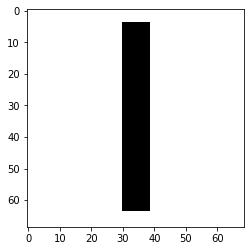

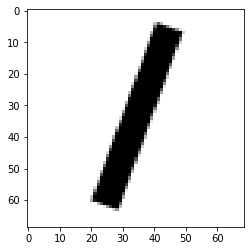

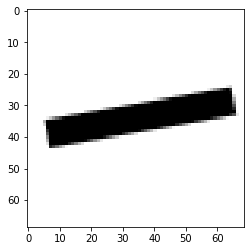

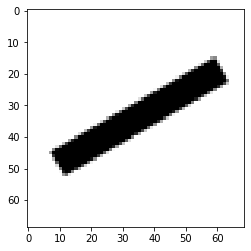

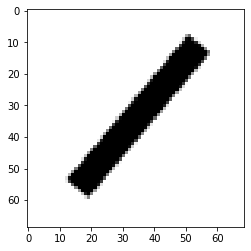

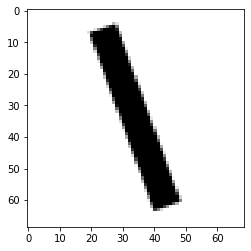

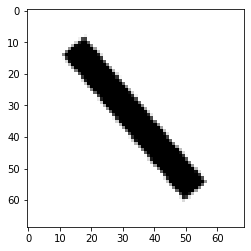

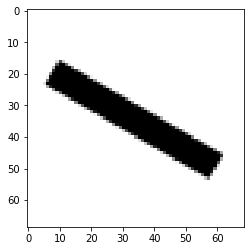

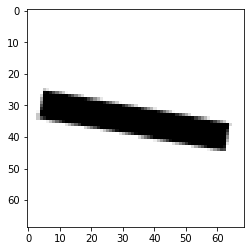

In [29]:
i = 0
for img in targets+distractors:
    plt.figure(i)
    plt.imshow(img, cmap='gray')
    i += 1

In [30]:
# homogeneous distractor
for i in range(len(num_items)):
    for n in range(1, num_stimuli_per_case+1):
        stim_img, tar_img, gt_img = gen_stimuli(num_items[i], 8*[targets[1]], targets[0])
            
        file_name = str(i*num_stimuli_per_case + n) + ".jpg"
        cv2.imwrite(homo_t0_path + 'stimuli/' + file_name, stim_img)
        cv2.imwrite(homo_t0_path + "target/" + file_name, tar_img)
        cv2.imwrite(homo_t0_path + "gt/" + file_name, gt_img)
        
for i in range(len(num_items)):
    for n in range(1, num_stimuli_per_case+1):
        stim_img, tar_img, gt_img = gen_stimuli(num_items[i], 8*[targets[0]], targets[1])
            
        file_name = str(i*num_stimuli_per_case + n) + ".jpg"
        cv2.imwrite(homo_t20_path + 'stimuli/' + file_name, stim_img)
        cv2.imwrite(homo_t20_path + "target/" + file_name, tar_img)
        cv2.imwrite(homo_t20_path + "gt/" + file_name, gt_img)

# heterogeneous distractor
for i in range(len(num_items)):
    for n in range(1, num_stimuli_per_case+1):
        stim_img, tar_img, gt_img = gen_stimuli(num_items[i], distractors+[targets[1]], targets[0])
            
        file_name = str(i*num_stimuli_per_case + n) + ".jpg"
        cv2.imwrite(hetero_t0_path + 'stimuli/' + file_name, stim_img)
        cv2.imwrite(hetero_t0_path + "target/" + file_name, tar_img)
        cv2.imwrite(hetero_t0_path + "gt/" + file_name, gt_img)
        
for i in range(len(num_items)):
    for n in range(1, num_stimuli_per_case+1):
        stim_img, tar_img, gt_img = gen_stimuli(num_items[i], distractors+[targets[0]], targets[1])
            
        file_name = str(i*num_stimuli_per_case + n) + ".jpg"
        cv2.imwrite(hetero_t20_path + 'stimuli/' + file_name, stim_img)
        cv2.imwrite(hetero_t20_path + "target/" + file_name, tar_img)
        cv2.imwrite(hetero_t20_path + "gt/" + file_name, gt_img)